Ben: Centroids

Ben: SVD bases

<s>Tangent distance</s>

<s>Tensor SVD</s>

Omar: eigenfaces (eigensigns)

Smoothing

Neural Networks?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
#from google.colab import drive
from tqdm import tqdm
import io
from sys import maxsize
from sklearn.utils.extmath import randomized_svd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d

In [2]:
# Assessment metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
import math

In [4]:
from PIL import Image

In [5]:
sign_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
    10: "K",
    11: "L",
    12: "M",
    13: "N",
    14: "O",
    15: "P",
    16: "Q",
    17: "R",
    18: "S",
    19: "T",
    20: "U",
    21: "V",
    22: "W",
    23: "X",
    24: "Y",
    25: "Z"
}

In [6]:
reduced_sign_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "K",
    10: "L",
    11: "M",
    12: "N",
    13: "O",
    14: "P",
    15: "Q",
    16: "R",
    17: "S",
    18: "T",
    19: "U",
    20: "V",
    21: "W",
    22: "X",
    23: "Y"
}

In [7]:
#df_train = pd.read_csv('/content/drive/MyDrive/sign data/sign_mnist_train/sign_mnist_train.csv')

In [8]:
#df_test = pd.read_csv('/content/drive/MyDrive/sign data/sign_mnist_test/sign_mnist_test.csv')

In [9]:
df_train = pd.read_csv('sign_mnist_train.csv')

In [10]:
df_test = pd.read_csv('sign_mnist_test.csv')

In [11]:
df_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [158]:
df_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [13]:
def getImageFromTrain(index):
  row = df_train.loc[index].tolist()
  sign = row[0]
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [14]:
def getImageFromTest(index):
  row = df_test.loc[index].tolist()
  sign = row[0]
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [15]:
def getImage(row):
  print(row)
  sign = row['label']
  print(sign)
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [16]:
getImage(df_train.loc[2])

label         2
pixel1      187
pixel2      188
pixel3      188
pixel4      187
           ... 
pixel780    199
pixel781    198
pixel782    195
pixel783    194
pixel784    195
Name: 2, Length: 785, dtype: int64
2
Sign:  C


# Method 1: Image Centroids

In [17]:
df_train_A = df_train.loc[df_train['label'] == 0]

In [18]:
df_train.loc[2]

label         2
pixel1      187
pixel2      188
pixel3      188
pixel4      187
           ... 
pixel780    199
pixel781    198
pixel782    195
pixel783    194
pixel784    195
Name: 2, Length: 785, dtype: int64

In [19]:
df_train_A.mean().astype(int)

label         0
pixel1      164
pixel2      165
pixel3      162
pixel4      161
           ... 
pixel780    184
pixel781    182
pixel782    182
pixel783    178
pixel784    174
Length: 785, dtype: int32

The getImage started only working for means when you also convert to type int. I swear it wasn't like this before and I don't know what changed

In [20]:
getImage(df_train_A.mean().astype(int))

label         0
pixel1      164
pixel2      165
pixel3      162
pixel4      161
           ... 
pixel780    184
pixel781    182
pixel782    182
pixel783    178
pixel784    174
Length: 785, dtype: int32
0
Sign:  A


In [21]:
sign_means = []


for i in range(0,26):
  sign_means.append(df_train.loc[df_train['label'] == i].mean())

temp = math.inf
min_index_index = 0
for i in range(0,26):
  if (np.linalg.norm(sign_means[i][1:] - df_test.loc[1][1:]) < temp):
    min_index_index = i
    temp = np.linalg.norm(sign_means[i][1:] - df_test.loc[1][1:])
print(sign_map[min_index_index])

In [22]:
getImageFromTest(1)

Sign:  F


In [23]:
df_train.shape

(27455, 785)

In [24]:
true = df_test.iloc[:,0].tolist()

In [25]:
true = [sign_map[k] for k in true]

In [26]:
df_train.iloc[:,1:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


Initial, inefficient implementation

In [27]:
class CentroidCompOld:
  def __init__(self):
    self.sign_means = []
    self.signs = 26

  def train(self,X):
    for i in range(0,26):
      self.sign_means.append(X.loc[X['label'] == i].mean())

  def get_centroids(self):
    return self.sign_means

  def predict(self,X):
    y_pred = []
    for index, row in tqdm(X.iterrows(), total=X.shape[0]):
        temp = math.inf
        min_index_index = 0
        for i in range(0,26):
          diff = np.linalg.norm(self.sign_means[i][1:] - X.loc[index][1:])
          if (diff < temp):
            min_index_index = i
            temp = diff
        y_pred.append(sign_map[min_index_index])        
    return y_pred

More efficient implementation. Reading 6 on clustering methods gave us a good set of measures to implement to compare the class means and test data.

In [28]:
class CentroidComp:
  def __init__(self,method="euclid", verbose=False, debug=False):
    self.sign_means = None
    self.method = method
    self.verbose = verbose
    if self.verbose or self.debug:
      print("Initialized centroid class with method " + self.method)

  def train(self,X):
    self.sign_means = X.groupby('label').mean().to_numpy()
    if self.verbose or self.debug:
      print("Trained model")

  def get_centroids(self):
    return self.sign_means

  def predict(self,X):
    y_pred = []
    if self.verbose or self.debug:
      print("Predicting model with " + self.method)

    if (self.method == "euclid"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmax(np.dot(self.sign_means,rowi) / (np.linalg.norm(self.sign_means, axis=1) * np.linalg.norm(rowi)))])
    
    elif (self.method == "cos"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmin(np.linalg.norm(self.sign_means - rowi, axis=1))])
    
    elif (self.method == "man"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmin(np.sum(np.abs(self.sign_means - rowi), axis=1))])

    elif (self.method == "cor"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        corr = np.corrcoef(self.sign_means, rowi)
        coefs = corr[:-1, -1]
        y_pred.append(reduced_sign_map[np.argmax(coefs)])

    else:
      return "you messed up"

    return y_pred

In [29]:
euclidModel = CentroidComp(method="euclid", verbose=True)
euclidModel.train(X = df_train)
y_pred_euclid = euclidModel.predict(df_test)
print(classification_report(y_pred_euclid, true))

Initialized centroid class with method euclid
Trained model
Predicting model with euclid
              precision    recall  f1-score   support

           A       0.76      0.56      0.65       448
           B       0.66      0.93      0.77       304
           C       0.61      0.67      0.64       281
           D       0.44      0.47      0.46       232
           E       0.66      0.76      0.71       435
           F       0.56      0.49      0.52       284
           G       0.48      0.51      0.49       329
           H       0.58      0.83      0.68       304
           I       0.24      0.29      0.27       240
           K       0.53      0.30      0.39       575
           L       0.66      0.63      0.64       218
           M       0.18      0.36      0.24       199
           N       0.25      0.37      0.30       196
           O       0.60      0.51      0.55       289
           P       0.82      0.49      0.62       577
           Q       0.83      0.75      0.79   

In [30]:
cosModel = CentroidComp(method="cos", verbose=True)
cosModel.train(X = df_train)
y_pred_cos = cosModel.predict(df_test)
print(classification_report(y_pred_cos, true))

Initialized centroid class with method cos
Trained model
Predicting model with cos
              precision    recall  f1-score   support

           A       0.56      0.58      0.57       323
           B       0.47      0.93      0.63       220
           C       0.53      0.67      0.59       244
           D       0.33      0.53      0.41       150
           E       0.51      0.63      0.56       407
           F       0.30      0.37      0.33       195
           G       0.43      0.52      0.47       290
           H       0.42      0.77      0.54       237
           I       0.36      0.16      0.23       640
           K       0.40      0.26      0.32       499
           L       0.36      0.66      0.46       114
           M       0.11      0.32      0.17       137
           N       0.19      0.42      0.26       132
           O       0.40      0.43      0.42       229
           P       0.80      0.39      0.53       712
           Q       0.58      0.17      0.26       56

In [31]:
manModel = CentroidComp(method="man", verbose=True)
manModel.train(X = df_train)
y_pred_man = manModel.predict(df_test)
print(classification_report(y_pred_man, true))

Initialized centroid class with method man
Trained model
Predicting model with man
              precision    recall  f1-score   support

           A       0.49      0.55      0.51       295
           B       0.31      0.85      0.46       160
           C       0.56      0.65      0.61       268
           D       0.25      0.63      0.36        99
           E       0.47      0.44      0.45       541
           F       0.27      0.25      0.26       263
           G       0.39      0.41      0.40       333
           H       0.33      0.78      0.46       182
           I       0.40      0.14      0.21       789
           K       0.39      0.22      0.28       584
           L       0.33      0.52      0.40       132
           M       0.09      0.41      0.15        85
           N       0.12      0.40      0.18        88
           O       0.36      0.37      0.36       238
           P       0.76      0.42      0.54       628
           Q       0.51      0.20      0.29       41

In [32]:
corModel = CentroidComp(method="cor", verbose=True)
corModel.train(X = df_train)
y_pred_cor = corModel.predict(df_test)
print(classification_report(y_pred_cor, true))

Initialized centroid class with method cor
Trained model
Predicting model with cor
              precision    recall  f1-score   support

           A       0.88      0.58      0.70       502
           B       0.66      0.84      0.74       340
           C       0.60      0.50      0.54       369
           D       0.51      0.43      0.47       287
           E       0.71      0.77      0.74       461
           F       0.58      0.41      0.48       349
           G       0.53      0.42      0.47       436
           H       0.52      0.78      0.62       287
           I       0.21      0.32      0.25       191
           K       0.56      0.31      0.40       603
           L       0.30      0.72      0.42        88
           M       0.10      0.24      0.14       165
           N       0.29      0.44      0.35       193
           O       0.51      0.35      0.42       355
           P       0.93      0.52      0.67       614
           Q       0.74      0.60      0.66       20

Euclid distance and pearson correlation are the best measures at nearly 50% accuracy.

# Method 2: SVD Bases

General

**Training**: For the training set of known signs, compute the SVD of each set of signs of one kind.

**Classification**: For a given test sign, compute its relative residual in all 10 bases. If one residual is significantly smaller than all others, classifiy aas that one.

---

Linear Algebra

**Training**: Compute SVDs of 10 matrices of dimenion m^2 x ni. Each digit is an mxm digitized image. ni is the number of training signs i.

**Classification**: Compute 10 least squares residuals




TO DO
- Experiment with number of bases
- Determine best number of bases for this dataset

In [33]:
train_SVDs = []
letters = df_train.groupby('label')
for name,group in letters:
  letter = group.drop('label', axis=1).values
  train_SVDs.append(np.linalg.svd(letter))

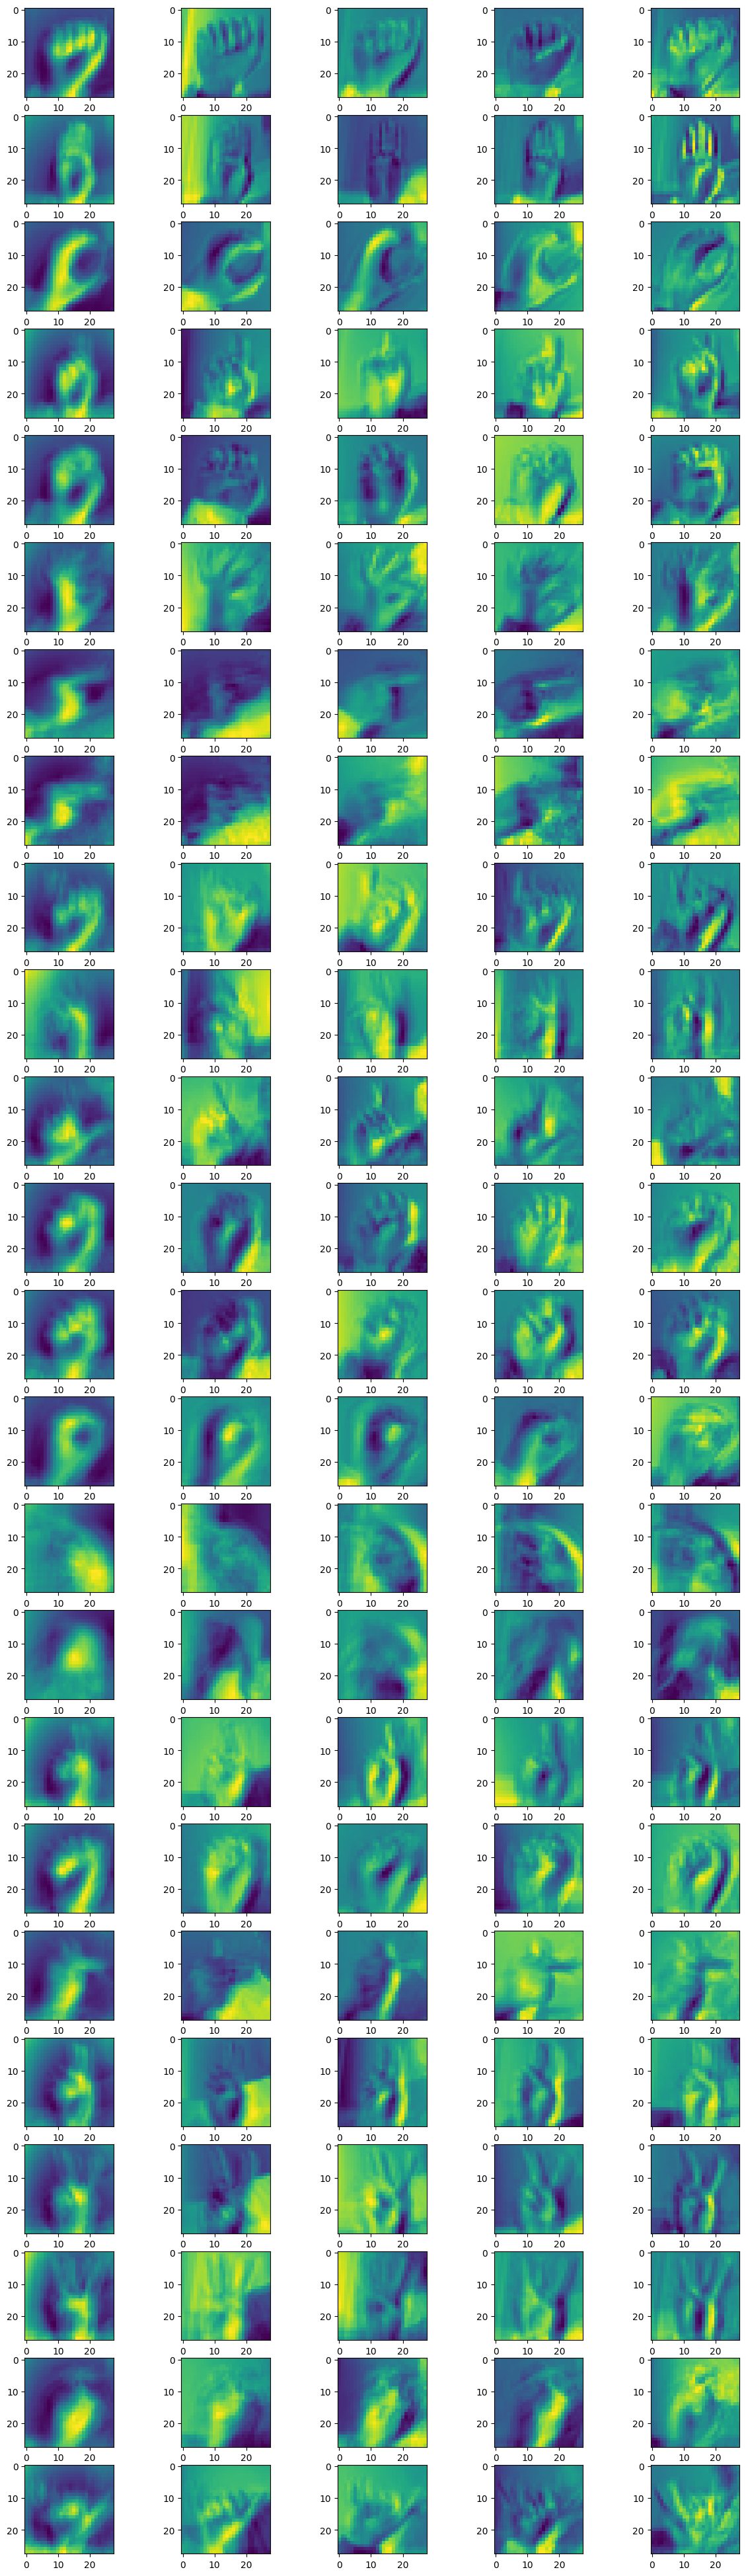

In [34]:
fig = plt.figure(1, figsize = [15, 50], dpi = 100)
c = 1
for j in range(len(reduced_sign_map)):
  for i in range(0,5):
    plt.subplot(24,5,c)
    plt.imshow(train_SVDs[j][2][i:i+1,:].reshape(28,28))
    c = c+1
fig.subplots_adjust(wspace=0.1)
plt.show()

In [35]:
# Randomized SVD as provided in notebook 12
def rSVD(X,r,q,p):
  # Step 1: Sample column space of X with P matrix
  ny = X.shape[1]
  P = np.random.randn(ny,r+p) # Gaussian Random Matrix
  Z = X @ P
  for k in range(q): # Power iteration
      Z = X @ (X.T @ Z)

  Q, R = np.linalg.qr(Z,mode='reduced')

  # Step 2: Compute SVD on projected Y = Q.T @ X
  Y = Q.T @ X
  UY, S, VT = np.linalg.svd(Y,full_matrices=0)
  U = Q @ UY

  return U, S, VT

In [192]:
class SVDBases:
    def __init__(self, bases=5, method='SVD', verbose=False):
        self.verbose = verbose
        self.bases = bases
        self.method = method
        self.SVDs = []
        if self.verbose:
            print("Initialized SVD Bases class")

    def train(self,X):
        letters = X.groupby('label')
        for name,group in letters:
            letter = group.drop('label', axis=1).values
            if (self.method=='SVD'):
                U, s, Vt = np.linalg.svd(letter.T)
                self.SVDs.append(U)
            elif (self.method=='rSVD'):
                U, s, Vt = randomized_svd(letter.T, n_components=10, random_state=0)
                self.SVDs.append(U)
            else:
                print('Something went wrong')

    def predict(self, X):
        y_pred = []
        diffs = []
        I = np.eye(784)
        #uTu = np.array([np.dot(u, u) for u in self.SVDs])
        for j in tqdm(range(len(X))):
            #z = X.iloc[:,1:].loc[j].to_numpy()
            #I-uTu
            
            #y_pred.append(reduced_sign_map[np.argmax(np.linalg.norm(np.dot(I-np.dot(self.SVDs[i][:, :self.bases], self.SVDs[i][:, :self.bases].T), rowi)))])

            # y_pred.append(reduced_sign_map[np.argmax(np.dot(self.sign_means,rowi) / (np.linalg.norm(self.sign_means, axis=1) * np.linalg.norm(rowi)))])
            
            min=maxsize
            index = 0
            for i in range(len(reduced_sign_map)):
                #print(np.dot(self.SVDs[i][:, :self.bases], self.SVDs[i][:, :self.bases].T))
                bases = (self.SVDs[i][:, :self.bases])
                diff = np.linalg.norm(np.dot(I-np.dot(bases, bases.T), X.iloc[j, 1:].to_numpy()))
                if (diff < min):
                    min = diff
                    index = i
                #break
            #break
            y_pred.append(reduced_sign_map[index])
            
        return y_pred

In [172]:
letters = df_test.groupby('label')
for name,group in letters:
  letter = group.drop('label', axis=1).values
  
  U, s, Vt = np.linalg.svd(letter.T)
  U2, s2, Vh2 = randomized_svd(letter.T, n_components=10, random_state=0)
  print(U)
  print()
  print(U2)
  break
  

[[-0.03845749 -0.01818469  0.00483292 ... -0.05450355 -0.01298206
   0.00824873]
 [-0.03859713 -0.01711765  0.00497491 ... -0.03651582 -0.07057396
  -0.01212554]
 [-0.03886988 -0.01593881  0.0047012  ...  0.00147281 -0.04405631
   0.00124651]
 ...
 [-0.03903079  0.00263583  0.05443959 ...  0.64120889 -0.01543077
  -0.01343121]
 [-0.0399325   0.00632415  0.06263392 ... -0.03074348  0.60499101
  -0.09753548]
 [-0.04027757  0.00839279  0.06652867 ... -0.00955598 -0.09039919
   0.60145059]]

[[ 0.03845749  0.01818469 -0.00483292 ...  0.01117598 -0.00023196
  -0.01544173]
 [ 0.03859713  0.01711765 -0.00497491 ...  0.00754624 -0.00037418
  -0.01273962]
 [ 0.03886988  0.01593881 -0.0047012  ...  0.00556018 -0.00276744
  -0.01313671]
 ...
 [ 0.03903079 -0.00263583 -0.05443959 ... -0.06434523 -0.04030173
   0.01128286]
 [ 0.0399325  -0.00632415 -0.06263392 ... -0.05056257 -0.0113273
   0.02424279]
 [ 0.04027757 -0.00839279 -0.06652867 ... -0.03959154  0.00482414
   0.02412493]]


In [193]:
SVDmodel = SVDBases(verbose=True, method='SVD', bases=20)

Initialized SVD Bases class


In [194]:
SVDmodel.train(df_train)

In [ ]:
y_pred = SVDmodel.predict(df_test)

 61%|███████████████████████████████████████████████▊                              | 4399/7172 [01:19<00:48, 57.53it/s]

In [ ]:
accuracy_score(y_pred, true)

In [169]:
uTu = np.array([np.dot(u[:, :20], u[:, :20].T) for u in SVDmodel.SVDs])

In [170]:
uTu

array([[[ 7.19129670e-03,  4.52196944e-03,  3.60780517e-03, ...,
         -1.03601969e-03, -2.27461501e-03, -3.56974713e-03],
        [ 4.52196944e-03,  8.83245430e-03,  9.58501962e-03, ...,
          9.86102163e-04,  8.08700103e-04,  2.58516003e-04],
        [ 3.60780517e-03,  9.58501962e-03,  1.32391753e-02, ...,
          1.94050201e-03,  1.72099215e-03,  5.42853447e-04],
        ...,
        [-1.03601969e-03,  9.86102163e-04,  1.94050201e-03, ...,
          5.15943525e-02,  5.27875617e-02,  5.20806514e-02],
        [-2.27461501e-03,  8.08700103e-04,  1.72099215e-03, ...,
          5.27875617e-02,  5.94579162e-02,  6.22272366e-02],
        [-3.56974713e-03,  2.58516003e-04,  5.42853447e-04, ...,
          5.20806514e-02,  6.22272366e-02,  6.90081298e-02]],

       [[ 1.38476633e-02,  1.22620228e-02,  9.16047197e-03, ...,
          2.31892171e-03,  4.39931395e-04,  1.02553576e-05],
        [ 1.22620228e-02,  1.49804044e-02,  1.04964898e-02, ...,
         -1.30449979e-03, -1.73217268e

In [126]:
I = np.eye(784)

In [142]:
(I-uTu).shape

(24, 784, 784)

In [125]:
df_test.loc[5]

label        21
pixel1       72
pixel2       79
pixel3       87
pixel4      101
           ... 
pixel780    194
pixel781    194
pixel782    195
pixel783    195
pixel784    194
Name: 5, Length: 785, dtype: int64

In [42]:
df_train.shape

(27455, 785)

In [43]:
print(classification_report(y_pred, true))

              precision    recall  f1-score   support

           A       1.00      0.05      0.09      7172
           B       0.00      0.00      0.00         0
           C       0.00      0.00      0.00         0
           D       0.00      0.00      0.00         0
           E       0.00      0.00      0.00         0
           F       0.00      0.00      0.00         0
           G       0.00      0.00      0.00         0
           H       0.00      0.00      0.00         0
           I       0.00      0.00      0.00         0
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           N       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
           P       0.00      0.00      0.00         0
           Q       0.00      0.00      0.00         0
           R       0.00      0.00      0.00         0
           S       0.00    

C:\Users\piggy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piggy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piggy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetri

In [44]:
y_pred[4]

'A'

In [45]:
df_test.loc[4]

label         3
pixel1      188
pixel2      191
pixel3      193
pixel4      195
           ... 
pixel780     46
pixel781     49
pixel782     46
pixel783     46
pixel784     53
Name: 4, Length: 785, dtype: int64

# Method 4: Smoothing

At the end of chapter 10, Elden recommends image smoothing as a way to improve performance. We attempted to apply some smoothing methods to improve the performance of the models we've made.

In [46]:
images = df_train.iloc[:,1:].values.reshape(-1, 28, 28)

In [47]:
filtered_images = np.zeros_like(images)
for i in range(len(images)):
    filtered_images[i] = gaussian_filter(images[i], sigma=1)

In [48]:
filtered_data = filtered_images.reshape(-1, 784)

In [49]:
filtered_df_train = pd.DataFrame(filtered_data)

In [50]:
filtered_df_train.insert(0, 'label', df_train['label'])

In [51]:
filtered_df_train.columns

Index(['label',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           774,     775,     776,     777,     778,     779,     780,     781,
           782,     783],
      dtype='object', length=785)

In [52]:
getImage(filtered_df_train.loc[1])

label      6
0        156
1        156
2        156
3        157
        ... 
779      131
780      134
781      123
782      122
783      129
Name: 1, Length: 785, dtype: int64
6
Sign:  G


In [53]:
model3 = CentroidComp(method="cor", verbose=True)

Initialized centroid class with method cor


In [54]:
model3.train(X = filtered_df_train)

Trained model


In [55]:
y_pred3 = model3.predict(df_test)

Predicting model with cor


In [56]:
accuracy_score(y_pred3, true)

0.45984383714445065

In [57]:
def smooth_row(row):
    smoothed_row = gaussian_filter1d(row, sigma=1)
    return pd.Series(smoothed_row, index=row.index)

In [58]:
smoothed_df_train = df_train.apply(smooth_row, axis=1)

In [59]:
smoothed_df_train['label'] = df_train['label']

In [60]:
smoothed_df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,80,111,125,133,138,142,146,149,152,...,206,206,206,206,206,205,205,204,203,202
1,6,111,147,155,156,156,156,156,157,157,...,99,117,118,106,115,141,147,134,133,142
2,2,132,176,186,187,186,186,186,187,186,...,202,201,200,199,198,198,197,195,194,194
3,2,149,199,210,211,211,210,210,210,210,...,234,233,232,231,229,226,224,221,207,186
4,13,120,158,169,172,175,178,180,183,184,...,91,100,106,116,134,151,158,162,167,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,136,179,189,190,191,192,192,193,193,...,127,131,109,88,107,165,206,214,218,222
27451,23,114,146,155,158,159,161,162,164,165,...,198,198,197,197,197,196,195,195,194,194
27452,18,127,164,173,174,174,174,174,173,173,...,132,174,200,206,205,204,203,201,200,200
27453,17,131,171,182,185,186,188,189,190,190,...,108,70,51,62,78,74,64,68,81,89


In [61]:
getImage(smoothed_df_train.loc[0])

label         3
pixel1       80
pixel2      111
pixel3      125
pixel4      133
           ... 
pixel780    205
pixel781    205
pixel782    204
pixel783    203
pixel784    202
Name: 0, Length: 785, dtype: int64
3
Sign:  D
